error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [1]:
#image translation
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))
cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
#image reflection
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv.warpPerspective(img, M,
                                   (int(cols),
                                    int(rows)))
cv.imshow('img', reflected_img)
cv.imwrite('reflection_out.jpg', reflected_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
#image rotation
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
img_rotation = cv.warpAffine(img,
                             cv.getRotationMatrix2D((cols/2, rows/2),
                                                    30, 0.6),
                             (cols, rows))
cv.imshow('img', img_rotation)
cv.imwrite('rotation_out.jpg', img_rotation)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
#image scaling
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
img_shrinked = cv.resize(img, (250, 200),
                         interpolation=cv.INTER_AREA)
cv.imshow('img', img_shrinked)
img_enlarged = cv.resize(img_shrinked, None,
                         fx=1.5, fy=1.5,
                         interpolation=cv.INTER_CUBIC)
cv.imshow('img', img_enlarged)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
#image croping
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
cropped_img = img[10:30, 100:300]
cv.imwrite('cropped_out.jpg', cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
#image shearing in x-axis
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
cv.imshow('img', sheared_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
#image shearing in y-axis
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/User/Downloads/girl.jfif', 0)
rows, cols = img.shape
M = np.float32([[1,   0, 0], [0.5, 1, 0], [0,   0, 1]])
sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
cv.imshow('sheared_y-axis_out.jpg', sheared_img)
cv.waitKey(0)
cv.destroyAllWindows()

Image Shape: 225 225
Original Image:
Down Sampled Image:
Up Sampled Image:


C:\Users\User\AppData\Local\Temp/ipykernel_2100/2559606250.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img2 = np.zeros((m//f, n//f), dtype=np.int)
C:\Users\User\AppData\Local\Temp/ipykernel_2100/2559606250.py:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

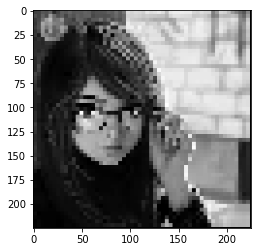

In [22]:
#image sampling
# Import cv2, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
  
  
# Read the original image and know its type
img1 = cv2.imread('C:/Users/User/Downloads/girl.jfif', 0)
  
# Obtain the size of the original image
[m, n] = img1.shape
print('Image Shape:', m, n)
  
# Show original image
print('Original Image:')
plt.imshow(img1, cmap="gray")
  
  
# Down sampling
  
# Assign a down sampling rate
# Here we are down sampling the
# image by 4
f = 4
  
# Create a matrix of all zeros for
# downsampled values
img2 = np.zeros((m//f, n//f), dtype=np.int)
  
# Assign the down sampled values from the original
# image according to the down sampling frequency.
# For example, if the down sampling rate f=2, take
# pixel values from alternate rows and columns
# and assign them in the matrix created above
for i in range(0, m, f):
    for j in range(0, n, f):
        try:
  
            img2[i//f][j//f] = img1[i][j]
        except IndexError:
            pass
  
  
# Show down sampled image
print('Down Sampled Image:')
plt.imshow(img2, cmap="gray")
  
  
# Up sampling
  
# Create matrix of zeros to store the upsampled image
img3 = np.zeros((m, n), dtype=np.int)
# new size
for i in range(0, m-1, f):
    for j in range(0, n-1, f):
        img3[i, j] = img2[i//f][j//f]
  
# Nearest neighbour interpolation-Replication
# Replicating rows
  
for i in range(1, m-(f-1), f):
    for j in range(0, n-(f-1)):
        img3[i:i+(f-1), j] = img3[i-1, j]
  
# Replicating columns
for i in range(0, m-1):
    for j in range(1, n-1, f):
        img3[i, j:j+(f-1)] = img3[i, j-1]
  
# Plot the up sampled image
print('Up Sampled Image:')
plt.imshow(img3, cmap="gray")

In [7]:
#bitwise image AND
# import required libraries
import cv2

# read two input images.
# The size of both images must be the same.
img1 = cv2.imread('C:/Users/User/Downloads/boy.jfif')
img2 = cv2.imread('C:/Users/User/Downloads/boy.jfif')

# compute bitwise AND on both images
and_img = cv2.bitwise_and(img1,img2)

# display the computed bitwise AND image
cv2.imshow('Bitwise AND Image', and_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
#bitwise image or
import cv2 
import numpy as np 
     
# path to input images are specified and   
# images are loaded with imread command  
img1 = cv2.imread('C:/Users/User/Downloads/boy.jfif')  
img2 = cv2.imread('C:/Users/User/Downloads/girl.jfif') 
  
# cv2.bitwise_or is applied over the
# image inputs with applied parameters 
dest_or = cv2.bitwise_or(img2, img1, mask = None)
  
# the window showing output image
# with the Bitwise OR operation
# on the input images
cv2.imshow('Bitwise OR', dest_or)
   
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [8]:
#bitwise xor
import cv2 
import numpy as np 
     
# path to input images are specified and   
# images are loaded with imread command  
img1 = cv2.imread('C:/Users/User/Downloads/girl.jfif')  
img2 = cv2.imread('C:/Users/User/Downloads/girl.jfif') 
  
# cv2.bitwise_xor is applied over the
# image inputs with applied parameters 
dest_xor = cv2.bitwise_xor(img1, img2, mask = None)
  
# the window showing output image
# with the Bitwise XOR operation
# on the input images
cv2.imshow('Bitwise XOR', dest_xor)
   
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

In [10]:
#bitwise not
import cv2 
import numpy as np 
     
# path to input images are specified and   
# images are loaded with imread command  
img1 = cv2.imread('C:/Users/User/Downloads/girl.jfif')  
img2 = cv2.imread('C:/Users/User/Downloads/boy.jfif') 
  
# cv2.bitwise_not is applied over the
# image input with applied parameters 
dest_not1 = cv2.bitwise_not(img1, mask = None)
dest_not2 = cv2.bitwise_not(img2, mask = None)
  
# the windows showing output image
# with the Bitwise NOT operation
# on the 1st and 2nd input image
cv2.imshow('Bitwise NOT on image 1', dest_not1)
cv2.imshow('Bitwise NOT on image 2', dest_not2)
   
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

In [47]:
# importing opencv
import cv2
  
# reading the images
circle = cv2.imread('C:/Users/User/Downloads/star.png')
star = cv2.imread('C:/Users/User/Downloads/star.png')
  
# subtract the images
subtracted = cv2.subtract(star, circle)
  
# TO show the output
cv2.imshow('image', subtracted)
  
# To close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

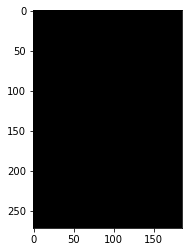

In [49]:
# import required libraries
import cv2
import matplotlib.pyplot as plt
# Read two images
img1 = cv2.imread('C:/Users/User/Downloads/boy.jfif')
img2 = cv2.imread('C:/Users/User/Downloads/star.png')


def subtract_images(img1, img2):
            
    height1, width1 = img1.shape[0],img1.shape[1]
    height2, width2 = img2.shape[0],img2.shape[1]
    
    min_height = min(height1, height2)
    min_width = min(width1, width2)
    
    img11 = img1[0:min_height, 0:min_width]
    img22 = img2[0:min_height, 0:min_width]
    
    img_sub = cv2.subtract(img11, img22)    
    
    img1[0:min_height,0:min_width] = img_sub
    
    return img1


img_sub_result = subtract_images(img1, img2)


# cv2.imshow('Subtracted image',img_sub_result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Convert the image from BGR to RGB
img_sub_result = cv2.cvtColor(img_sub_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_sub_result)
plt.show()

In [5]:
#image addition
import cv2
  
# Read Image1
rx1 = cv2.imread('C:/Users/User/Pictures/rx1.jpg', 1)
  
# Read image2
rx2 = cv2.imread('C:/Users/User/Pictures/rx2.jpg', 1)
  
# Add the images
img = cv2.add(rx1,rx2)
  
# Show the image
cv2.imshow('image', img)
  
# Wait for a key
cv2.waitKey(0)
  
# Distroy all the window open
cv2.destroyAllWindows()


In [6]:
# image subtaction
# importing opencv
import cv2
  
# reading the images
rx3 = cv2.imread('C:/Users/User/Pictures/rx3.jpg')
rx4 = cv2.imread('C:/Users/User/Pictures/rx4.jpg')
  
# subtract the images
subtracted = cv2.subtract(rx3,rx4)
  
# TO show the output
cv2.imshow('image', subtracted)
  
# To close the window
cv2.waitKey(0)
cv2.destroyAllWindows()
